In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- Step 1: Load the Data ---
# Loading the data directly (semicolon-separated file)
input_file = '/content/bank-additional-full.csv' 
data = pd.read_csv(input_file, delimiter=';')

# Replaced '?' with NaN
data.replace('?', np.nan, inplace=True)

for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.strip()


# Save dataset after initial load and cleanup
data.to_csv('dataset_after_initial_load.csv', index=False)
print("Dataset saved: After Initial Load and Cleanup")


Dataset saved: After Initial Load and Cleanup


In [3]:
# Print initial data overview
print("Initial Data Overview:")
print(data.head())


Initial Data Overview:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx 

In [4]:
print("\nMissing Values Before Imputation:")
print(data.isnull().sum())


Missing Values Before Imputation:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [5]:

# --- Step 2: Handle Missing Values ---
# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute numerical columns with the mean
num_imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])

# Save dataset after imputing numerical columns
data.to_csv('dataset_after_numerical_imputation.csv', index=False)
print("Dataset saved: After Numerical Imputation")

# Impute categorical columns with the most frequent value (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

# Save dataset after imputing categorical columns
data.to_csv('dataset_after_categorical_imputation.csv', index=False)
print("Dataset saved: After Categorical Imputation")

Dataset saved: After Numerical Imputation
Dataset saved: After Categorical Imputation


In [6]:
# Confirm that missing values are handled
print("\nMissing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [7]:
# --- Step 3: Encode Categorical Variables ---
# Encode target column if necessary (assumed as 'y')
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  

# Save dataset after encoding categorical variables
data.to_csv('dataset_after_encoding.csv', index=False)
print("Dataset saved: After Encoding Categorical Variables")


Dataset saved: After Encoding Categorical Variables


In [8]:
print("\nData After Encoding:")
print(data.head())



Data After Encoding:
    age  job  marital  education  default  housing  loan  contact  month  \
0  56.0    3        1          0        0        0     0        1      6   
1  57.0    7        1          3        1        0     0        1      6   
2  37.0    7        1          3        0        2     0        1      6   
3  40.0    0        1          1        0        0     0        1      6   
4  56.0    7        1          3        0        0     2        1      6   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1  ...       1.0  999.0       0.0         1           1.1   
1            1  ...       1.0  999.0       0.0         1           1.1   
2            1  ...       1.0  999.0       0.0         1           1.1   
3            1  ...       1.0  999.0       0.0         1           1.1   
4            1  ...       1.0  999.0       0.0         1           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.

In [9]:
# --- Step 4: Split Data into Train/Test ---
# Define X (features) and y (target)
X = data.drop('y', axis=1)  
y = data['y']

# Encode the target column ('y') to 0 and 1
data['y'] = data['y'].map({'yes': 1, 'no': 0})  # Encode 'yes' as 1, 'no' as 0


# Save dataset before train-test split
X.to_csv('final_features_before_split.csv', index=False)
y.to_csv('final_target_before_split.csv', index=False)
print("Dataset saved: Final Features and Target Before Split")

Dataset saved: Final Features and Target Before Split


In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of Training Data:", X_train.shape)
print("Shape of Testing Data:", X_test.shape)


Shape of Training Data: (32950, 20)
Shape of Testing Data: (8238, 20)


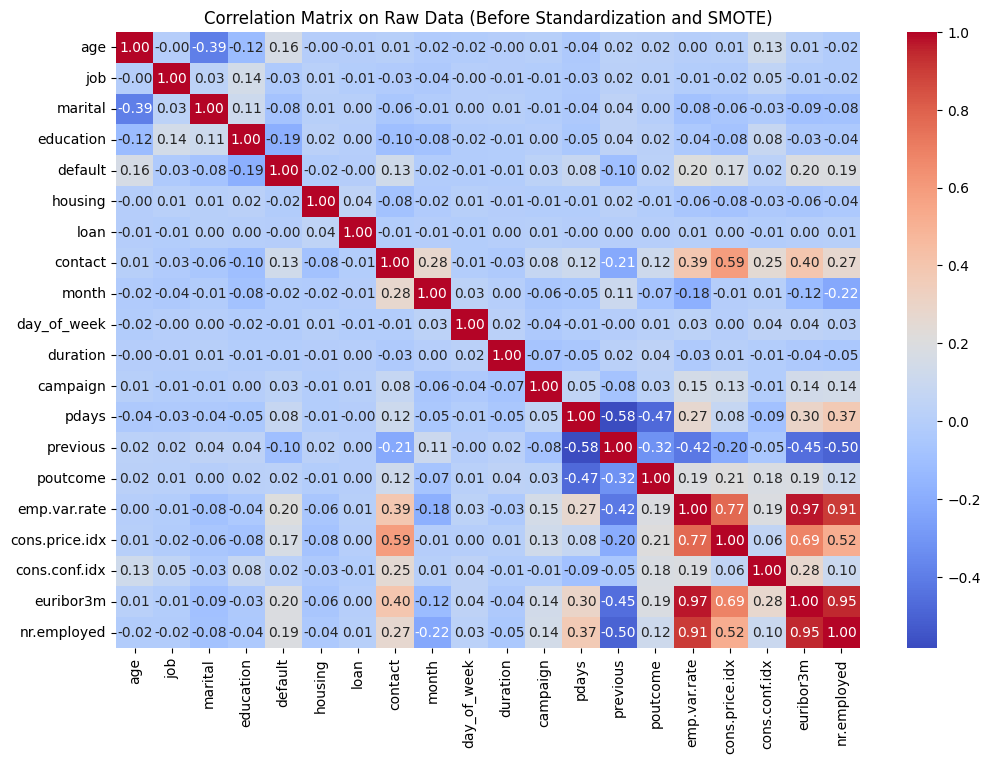

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix on raw training data
correlation_matrix = X_train[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix on Raw Data (Before Standardization and SMOTE)")
plt.show()


In [12]:
# --- Step 5: Standardize Numerical Features ---
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [13]:
# Validate standardization
print("\nStandardization Validation:")
print("Mean of numerical columns (Train):", X_train[numerical_cols].mean().round(4))
print("Std of numerical columns (Train):", X_train[numerical_cols].std().round(4))


Standardization Validation:
Mean of numerical columns (Train): age               0.0
job               0.0
marital           0.0
education        -0.0
default          -0.0
housing           0.0
loan             -0.0
contact          -0.0
month            -0.0
day_of_week       0.0
duration         -0.0
campaign          0.0
pdays            -0.0
previous          0.0
poutcome         -0.0
emp.var.rate     -0.0
cons.price.idx    0.0
cons.conf.idx    -0.0
euribor3m         0.0
nr.employed      -0.0
dtype: float64
Std of numerical columns (Train): age               1.0
job               1.0
marital           1.0
education         1.0
default           1.0
housing           1.0
loan              1.0
contact           1.0
month             1.0
day_of_week       1.0
duration          1.0
campaign          1.0
pdays             1.0
previous          1.0
poutcome          1.0
emp.var.rate      1.0
cons.price.idx    1.0
cons.conf.idx     1.0
euribor3m         1.0
nr.employed       1.0
dtype: 

In [14]:
# Save standardized training and testing data
pd.DataFrame(X_train, columns=X.columns).to_csv('standardized_train_features.csv', index=False)
pd.DataFrame(X_test, columns=X.columns).to_csv('standardized_test_features.csv', index=False)
y_train.to_csv('train_target.csv', index=False)
y_test.to_csv('test_target.csv', index=False)
print("Dataset saved: Standardized Train and Test Features with Targets")

print("\nData Standardization Complete!")
print(X_train[:5])

Dataset saved: Standardized Train and Test Features with Targets

Data Standardization Complete!
            age       job   marital  education   default   housing      loan  \
12556 -0.001669 -0.757583 -0.284040  -0.818132  1.948567  0.942068 -0.453477   
35451 -0.864095 -1.036072 -0.284040   1.052776 -0.512631 -1.088424 -0.453477   
30592  1.819007  0.356373 -0.284040  -1.753586 -0.512631 -1.088424 -0.453477   
17914  0.285806 -0.200605 -1.919677  -0.818132 -0.512631  0.942068 -0.453477   
3315  -0.097494 -1.036072  1.351597  -0.350405  1.948567 -1.088424 -0.453477   

        contact     month  day_of_week  duration  campaign     pdays  \
12556  1.319656 -0.531489    -0.719415 -0.631114 -0.206242  0.194661   
35451 -0.757773  0.762893    -0.719415 -0.546321  0.513676  0.194661   
30592 -0.757773  0.762893    -0.719415 -0.943306  1.233593  0.194661   
17914 -0.757773 -0.531489     0.711252 -0.631114  0.873635  0.194661   
3315   1.319656  0.762893    -0.004081  0.332441 -0.206242  0.

In [15]:
#Check for Imbalance
from collections import Counter
from imblearn.over_sampling import SMOTE

# Check class distribution
print("Class Distribution Before SMOTE:")
print(Counter(y_train))

# Apply SMOTE only to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Class Distribution After SMOTE:")
print(Counter(y_train_res))

# Combine the features and target into a single DataFrame
smote_train_data = pd.DataFrame(X_train_res, columns=X.columns)  # Add feature names back
smote_train_data['y'] = y_train_res  # Append the target column

# Save to a CSV file
smote_train_data.to_csv('smote_balanced_train_data.csv', index=False)
print("SMOTE Balanced Training Data Saved Successfully!")

Class Distribution Before SMOTE:
Counter({0: 29245, 1: 3705})
Class Distribution After SMOTE:
Counter({0: 29245, 1: 29245})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


SMOTE Balanced Training Data Saved Successfully!


Step 1: Train the Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)

# Train the model on the SMOTE-resampled training data
rf_model.fit(X_train_res, y_train_res)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # For AUC-ROC!!!

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Calculate and display the AUC-ROC score
print("\nAUC-ROC Score:", roc_auc_score(y_test, y_proba_rf))




/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      5849
           1       0.88      0.79      0.83      5849

    accuracy                           0.84     11698
   macro avg       0.84      0.84      0.84     11698
weighted avg       0.84      0.84      0.84     11698


Confusion Matrix:
[[5231  618]
 [1241 4608]]

AUC-ROC Score: 0.9082285591617688


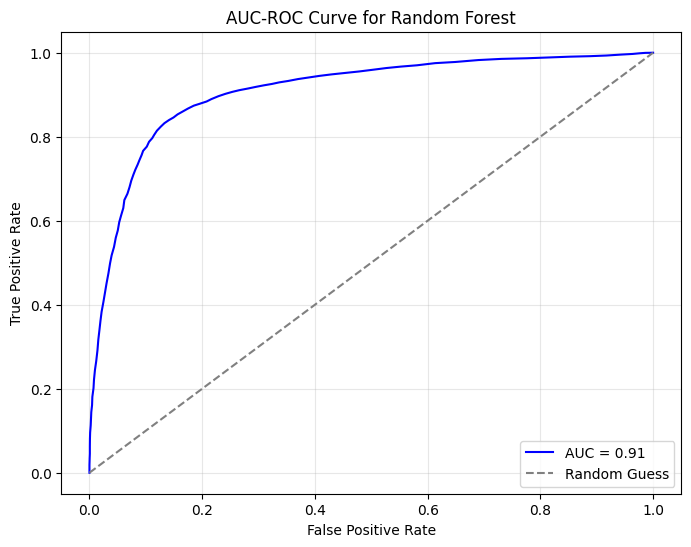

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)  

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot the AUC-ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


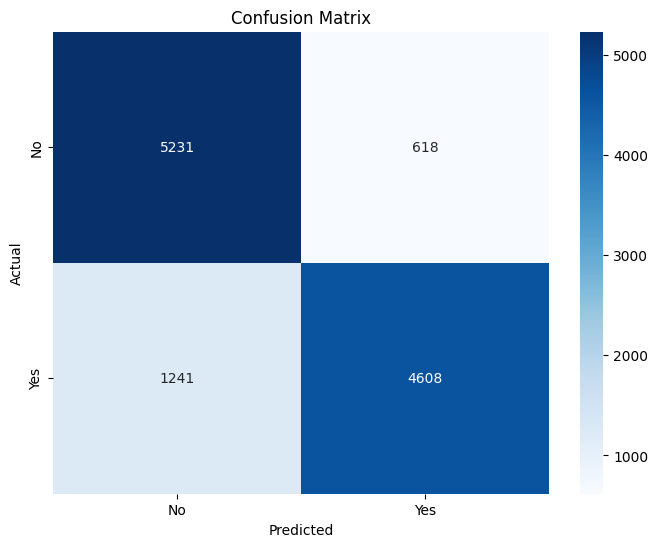

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf) 

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<ipython-input-19-d4be7e48fac3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette="viridis")


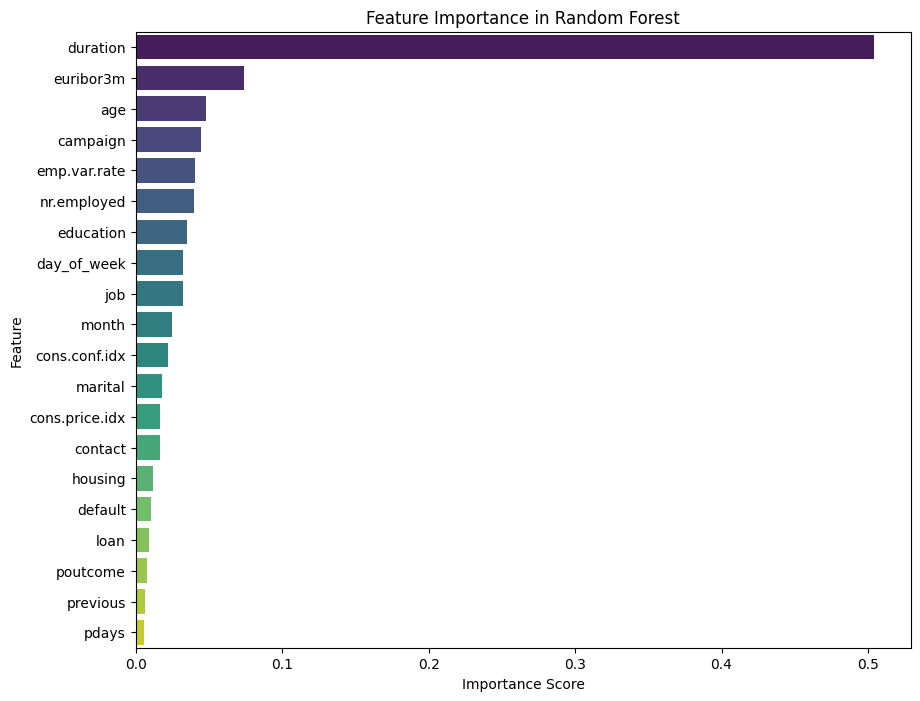

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get feature importance
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train_res.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1170/1170 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8008 - loss: 0.4346 - val_accuracy: 0.8802 - val_loss: 0.2978
Epoch 2/100
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8756 - loss: 0.3101 - val_accuracy: 0.8818 - val_loss: 0.2888
Epoch 3/100
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8851 - loss: 0.2885 - val_accuracy: 0.8883 - val_loss: 0.2751
Epoch 4/100
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8868 - loss: 0.2837 - val_accuracy: 0.8919 - val_loss: 0.2653
Epoch 5/100
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8890 - loss: 0.2769 - val_accuracy: 0.8970 - val_loss: 0.2631
Epoch 6/100
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8921 - loss: 0.2734 - val_accuracy: 0.8957 - val_loss: 0.2565
Epoch 7/100
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8946 - loss: 0.2673 - val_accuracy: 0.8993 - val_loss: 0.2532
Epoch 8/100
1170/1170 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8928 - loss: 0.2666 - val_

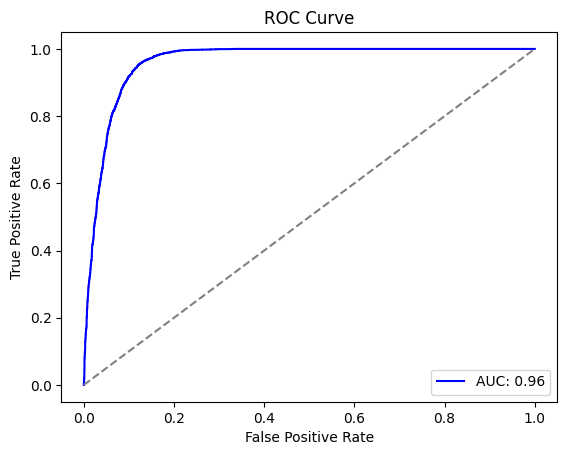

Neural Network model saved as 'neural_network_model.h5'


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the preprocessed dataset

data = pd.read_csv('smote_balanced_train_data.csv')

# Split the data into features and target
X = data.drop(columns=['y'])
y = data['y']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Generate evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'AUC: {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



# Save the model
model.save('neural_network_model.h5')
print("Neural Network model saved as 'neural_network_model.h5'")


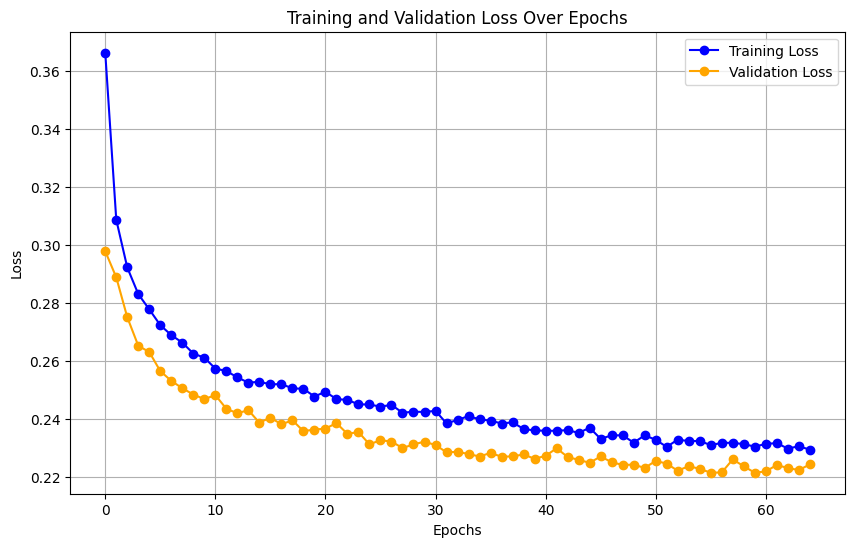

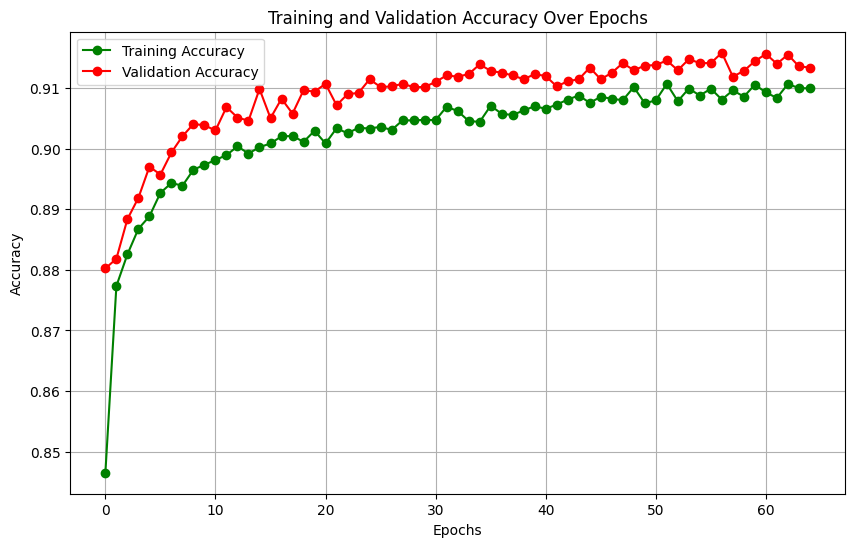

In [21]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', marker='o')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [22]:
print(roc_auc)

0.9612863785329083


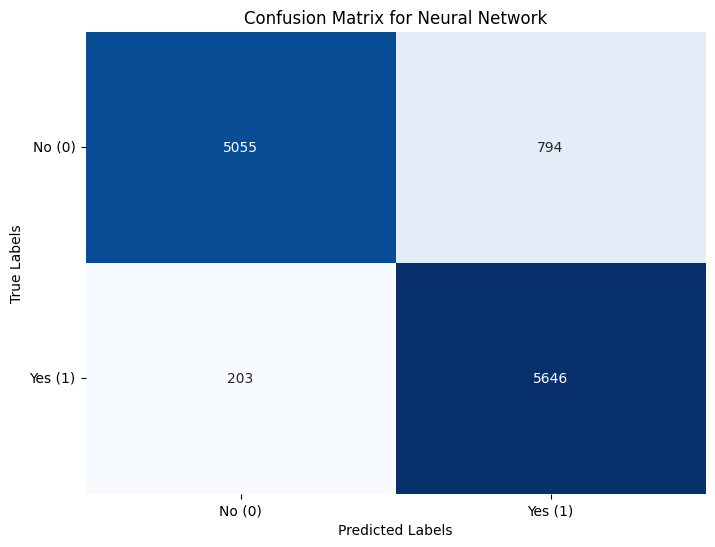

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)  

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Neural Network')
plt.xticks([0.5, 1.5], ['No (0)', 'Yes (1)'], fontsize=10) 
plt.yticks([0.5, 1.5], ['No (0)', 'Yes (1)'], fontsize=10, rotation=0)
plt.show()
